In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from scipy.signal import find_peaks as pk
from scipy.optimize import curve_fit as cf
from math import floor

def leermd(filename):
    result = []
    df = read_csv(filename, sep='\t', skiprows=3, decimal=',')
    nparray = df.values
    nparray = nparray[~np.isnan(nparray).any(axis=1)]
    for cols in range(nparray.shape[1]):
        out = nparray[:,cols]
        result.append(out)
    return result

m = 0.22715
err_m = 0.0001
err_t = 1/150
err_f = 0.793118

In [2]:
def max_calc(filename,prmnnc,h,l):
    ts,pos = leermd(filename)
    idx_max = pk(pos[0:9000],height=np.mean(pos),prominence=prmnnc,distance=12)[0]
    plt.figure(figsize=(l,h))
    plt.scatter(ts[0:9000],pos[0:9000],c='g')
    plt.plot(ts[idx_max],pos[idx_max],'ko')
    return [ts[idx_max],pos[idx_max]]

def temp_calc(max_array):
    temps =  np.diff(max_array[0])
    return temps

Aire

sigma_w_air = 0.003027655829538787


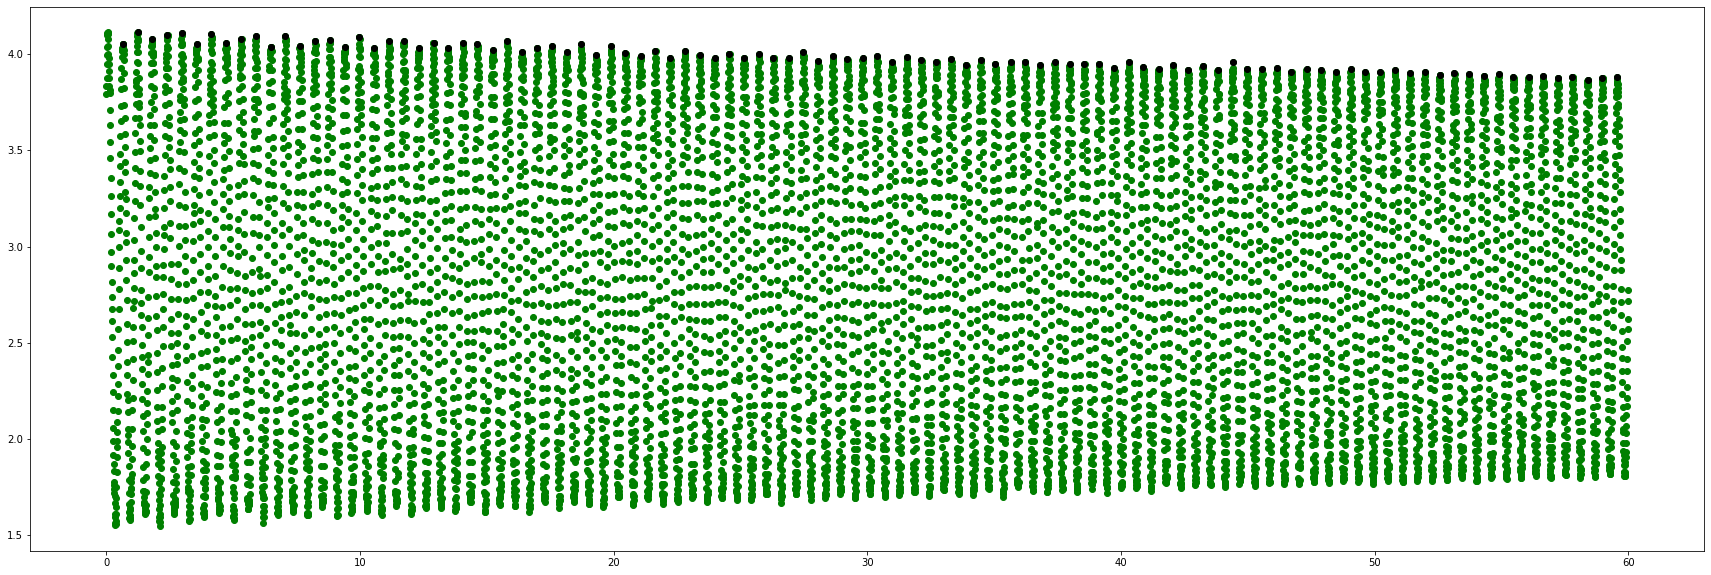

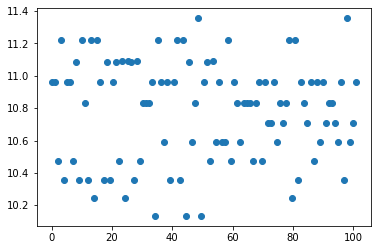

In [3]:
max_air = max_calc('1A.txt',2,10,30)
temps_air = temp_calc(max_air)
w_air = 2*np.pi/temps_air
print('sigma_w_air = ' + str(np.std(w_air)/len(w_air)))
plt.show()
plt.scatter(np.linspace(0,len(w_air),len(w_air)),w_air)

Agua

sigma_w_wtr = 0.005358512758790497


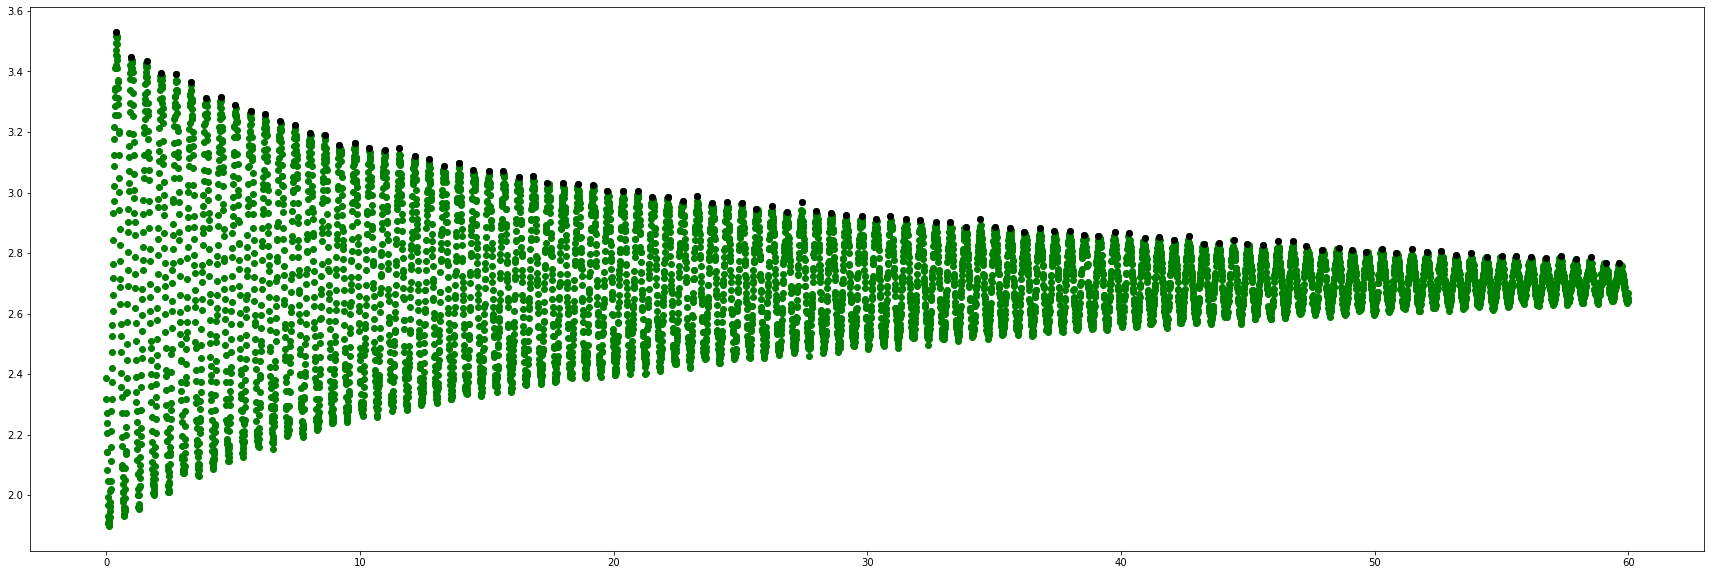

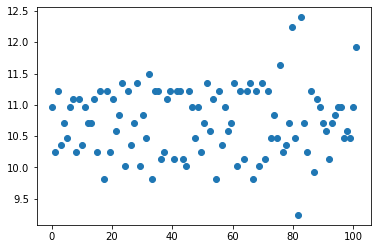

In [4]:
max_wtr = max_calc('1A (agua).txt',0.06,10,30)
temps_wtr = temp_calc(max_wtr)
w_wtr = 2*np.pi/temps_wtr
print('sigma_w_wtr = ' + str(np.std(w_wtr)/len(w_wtr)))
plt.show()
plt.scatter(np.linspace(0,len(w_wtr),len(w_wtr)),w_wtr)

In [5]:
w0 = np.sqrt(45.7888786/m)
w = np.mean(w_wtr)

print(w0**2-w**2)
print(m)

lmbd = np.sqrt(w0**2 - w**2)
print(lmbd)

#????????

86.21537086395625
0.22715
9.285223253317943


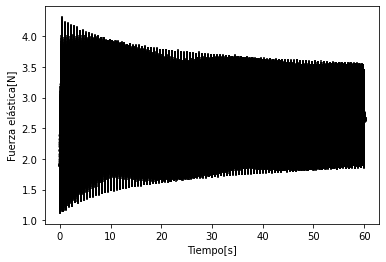

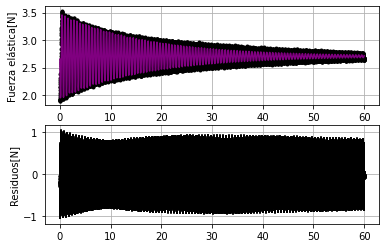

In [6]:
sub_am = lambda x,l,A,B,phi : A*np.exp(-l*x)*np.sin(w*x+phi)+B

def adj_sub(filename,time_error,force_error):
    ts,force = leermd(filename)
    x = ts[0:9000]
    y = force[0:9000]
    err_x = time_error
    err_y = force_error
    popt,cov = cf(sub_am,x,y)
    l,A,B,phi = popt
    err_l = cov[0,0]
    err_A = cov[1,1]
    err_B = cov[2,2]
    err_phi = cov[3,3]
    x_adj = np.linspace(min(x),max(x),1000)
    y_adj = sub_am(x_adj,l,A,B,phi)
    return [[x,y],[err_x,err_y]],[x_adj,y_adj],[[l,A,B,phi],[err_l,err_A,err_B,err_phi]]

pts_sub,adj_sub,things_sub = adj_sub('1A (agua).txt',err_t,err_f)
plt.errorbar(pts_sub[0][0],pts_sub[0][1],xerr=pts_sub[1][0],yerr=pts_sub[1][1],fmt='k.',ecolor='k')
plt.xlabel('Tiempo[s]')
plt.ylabel('Fuerza elástica[N]')
plt.show()
l_sub,A_sub,B_sub,phi_sub = things_sub[0]
ax1 = plt.subplot(2,1,1)
plt.plot(pts_sub[0][0],pts_sub[0][1],'k.')
plt.plot(adj_sub[0],adj_sub[1],'purple')
plt.xlabel('Tiempo[s]')
plt.ylabel('Fuerza elástica[N]')
plt.grid()
    
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(pts_sub[0][0],pts_sub[0][1]-sub_am(pts_sub[0][0],l_sub,A_sub,B_sub,phi_sub),xerr=pts_sub[1][0],yerr=pts_sub[1][1],fmt='k.',ecolor='k')
plt.ylabel('Residuos[N]')
plt.grid()
plt.show()

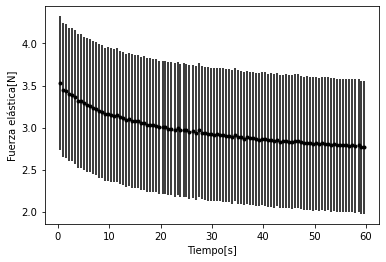

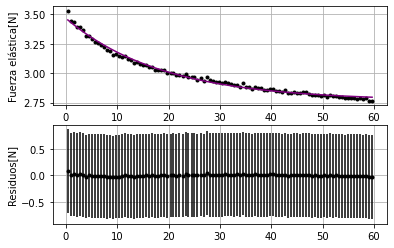

lambda = 0.053111595110005023


In [7]:
exp_n = lambda x,l,A,B : A*np.exp(-l*x) + B

def adj_exp(maximos,time_error,force_error):
    x,y = maximos
    err_x = time_error
    err_y = force_error
    popt,cov = cf(exp_n,x,y)
    l,A,B = popt
    err_l = cov[0,0]
    err_A = cov[1,1]
    err_B = cov[2,2]
    x_adj = np.linspace(min(x),max(x),1000)
    y_adj = exp_n(x_adj,l,A,B)
    return [[x,y],[err_x,err_y]],[x_adj,y_adj],[[l,A,B],[err_l,err_A,err_B]]

pts_exp,adj_exp,things_exp = adj_exp(max_wtr,err_t,err_f)
plt.errorbar(pts_exp[0][0],pts_exp[0][1],xerr=pts_exp[1][0],yerr=pts_exp[1][1],fmt='k.',ecolor='k')
plt.xlabel('Tiempo[s]')
plt.ylabel('Fuerza elástica[N]')
plt.show()
l_exp,A_exp,B_exp = things_exp[0]
err_B_exp = things_exp[1][2]
ax1 = plt.subplot(2,1,1)
plt.plot(pts_exp[0][0],pts_exp[0][1],'k.')
plt.plot(adj_exp[0],adj_exp[1],'purple')
plt.xlabel('Tiempo[s]')
plt.ylabel('Fuerza elástica[N]')
plt.grid()
    
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(pts_exp[0][0],pts_exp[0][1]-exp_n(pts_exp[0][0],l_exp,A_exp,B_exp),xerr=pts_exp[1][0],yerr=pts_exp[1][1],fmt='k.',ecolor='k')
plt.ylabel('Residuos[N]')
plt.grid()
plt.show()

print('lambda = ' + str(l_exp))

(90,)


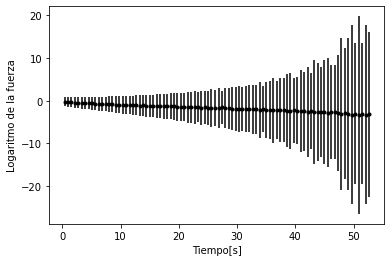

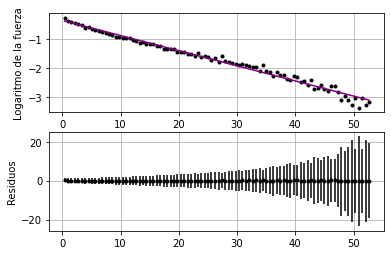

lambda = 0.05229800042749628


In [8]:
lineal = lambda x,l,B : -l*x + B

def log_scale(maximos,time_error,force_error):
    x,y = maximos
    err_x= time_error
    err_y = force_error
    x_log = x[0:-12]
    y_log = np.log(y[0:-12]-B_exp)
    err_x_log = err_x
    err_y_log = np.sqrt(err_y**2 + err_B_exp**2)/abs(y[0:-12]-B_exp)
    return [x_log,y_log],[err_x_log,err_y_log]

def adj_lin_log(maximos,time_error,force_error):
    points,errors = log_scale(maximos,time_error,force_error)
    x,y = points
    err_x,err_y = errors
    err_array = err_y
    print(np.shape(y))
    popt,cov = cf(lineal,x,y,sigma=err_array,absolute_sigma=True)
    l,B = popt
    err_l = cov[0,0]
    err_B = cov[1,1]
    x_adj = np.linspace(min(x),max(x),1000)
    y_adj = lineal(x_adj,l,B)
    return [[x,y],[err_x,err_y]],[x_adj,y_adj],[[l,B],[err_l,err_B]]

pts_log,adj_log,things_log = adj_lin_log(max_wtr,err_t,err_f)
plt.errorbar(pts_log[0][0],pts_log[0][1],xerr=pts_log[1][0],yerr=pts_log[1][1],fmt='k.',ecolor='k')
plt.xlabel('Tiempo[s]')
plt.ylabel('Logaritmo de la fuerza')
plt.show()
l_log,B_log = things_log[0]
ax1 = plt.subplot(2,1,1)
plt.plot(pts_log[0][0],pts_log[0][1],'k.')
plt.plot(adj_log[0],adj_log[1],'purple')
plt.xlabel('Tiempo[s]')
plt.ylabel('Logaritmo de la fuerza')
plt.grid()
    
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.errorbar(pts_log[0][0],pts_log[0][1]-lineal(pts_log[0][0],l_log,B_log),xerr=pts_log[1][0],yerr=pts_log[1][1],fmt='k.',ecolor='k')
plt.ylabel('Residuos')
plt.grid()
plt.show()

print('lambda = ' + str(l_log))